**Studying Statistical Error vs. Computational Error in Lasso:**

First, we generate some data samples followign a linear regression problem $Y=X\boldsymbol{\theta}^*+\boldsymbol{\epsilon}$, in which, $\boldsymbol{\theta}^*$ is a sparse vector of level 70, $X\in R^{500\times 1500}$

$\widehat{\boldsymbol{\theta}}$ is then the converged solution of  lasso with tuning $0.2$ after $500$ iterations of optimization

We employ $\widetilde {\boldsymbol{\theta}}_t$ as the lasso solution in iterations $t$

$\boldsymbol{\theta}^* \in R^{1500}$ is the target vector

We then plot two curves:

1. $||\widetilde{\boldsymbol{\theta}}_t-\widehat{\boldsymbol{\theta}}||_2$ as the computational error  

<!-- 2.~$||\theta^*-\hat\theta||$  as the statistical error  (in red)  (since we have simukated the target, we know exactly the value of $\theta^*$) -->

2. $||\widetilde{\boldsymbol{\theta}}_t-\boldsymbol{\theta}^*||_2$ as the total error  

**Maybe the take a way is that stopping the optimization in around $t=10$ is enough?**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns
sns.set_theme(style="whitegrid")

warnings.filterwarnings("ignore")

# Seed for reproducibility
np.random.seed(42)

# Parameters for data generation
n_samples = 500
n_features = 1500
n_nonzero_coefs = 70
signal_noise_ratio = 3.0
correlation = 0.4

# Generate covariance matrix for features
Sigma_X = (1 - correlation) * np.eye(n_features) + correlation * np.ones((n_features, n_features))
mu_X = np.zeros(n_features)

# Generate feature matrix X
X = np.random.multivariate_normal(mean=mu_X, cov=Sigma_X, size=n_samples)

# Normalize columns to have Euclidean norm sqrt(n_samples)
X = np.sqrt(n_samples) * (X / np.sqrt(np.sum(X**2, axis=0)))

# Generate sparse true coefficients
true_coefs = np.zeros(n_features)
nonzero_indices = np.random.choice(n_features, n_nonzero_coefs, replace=False)
true_coefs[nonzero_indices] = np.random.uniform(1, n_nonzero_coefs, n_nonzero_coefs)

# Rescale coefficients to match the desired signal-to-noise ratio
true_coefs = np.sqrt(signal_noise_ratio * n_samples / np.linalg.norm(X @ true_coefs)**2) * true_coefs

# Generate response vector y with noise
y = X @ true_coefs + np.random.randn(n_samples) * 0.8

# Define Lasso optimization parameters
alpha = 0.2  # Regularization parameter
n_iterations = 600  # Number of optimization steps

# Track results
computational_accuracy = []
coef_gap = []

# Simulate iterative Lasso optimization (emulating convergence)
lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=n_iterations, warm_start=True)
optim_coef = lasso.fit(X, y).coef_   #lasso solution converged

lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1, warm_start=True)

for iteration in range(1, n_iterations + 1):
    lasso.fit(X, y)

    # Compute computational accuracy (distance to converged lasso)
    computational_gap = np.linalg.norm(lasso.coef_ - optim_coef)
    computational_accuracy.append(computational_gap)

    # Compute the gap between estimated and true coefficients
    gap = np.linalg.norm(lasso.coef_ - true_coefs)
    coef_gap.append(gap)

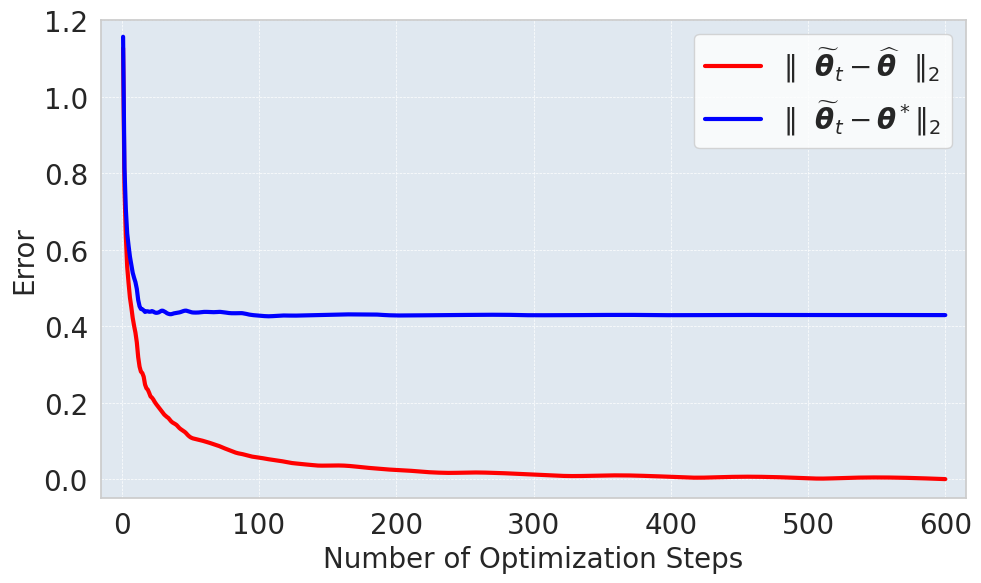

In [ ]:
# Plot results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set gray background and grid
ax1.set_facecolor("#e0e8f0")  # Milder gray (grayscale value)
ax1.grid(color="white", linestyle="--", linewidth=0.5)
ax1.tick_params(axis="both", labelsize=20)


# Plot computational accuracy
ax1.plot(range(1, n_iterations + 1), computational_accuracy, color="red",
         label=r"$\|~~\widetilde{\boldsymbol{\theta}}_t - \widehat{\boldsymbol{\theta}}~~\|_2$", linewidth=3)
ax1.set_xlabel("Number of Optimization Steps", fontsize=20)
ax1.set_ylabel(r"Error", fontsize=20)
ax1.tick_params(axis="y")
ax1.set_xlim(-15, 615)  # Ensure x-values like -1.0 are logically needed
ax1.set_ylim(-0.05, 1.2)   # Set y-axis range from 0 to 10

# Plot coefficient gap on the same axis
ax1.plot(range(1, n_iterations + 1), coef_gap, color="blue",
         label=r"$\|~~\widetilde{\boldsymbol{\theta}}_t - \boldsymbol{\theta}^*\|_2$", linewidth=3)

# Add legend and title
fig.tight_layout()
ax1.legend(loc="upper right", fontsize=20)
plt.savefig("plot_output1.pdf", format="pdf", bbox_inches="tight")

plt.show()


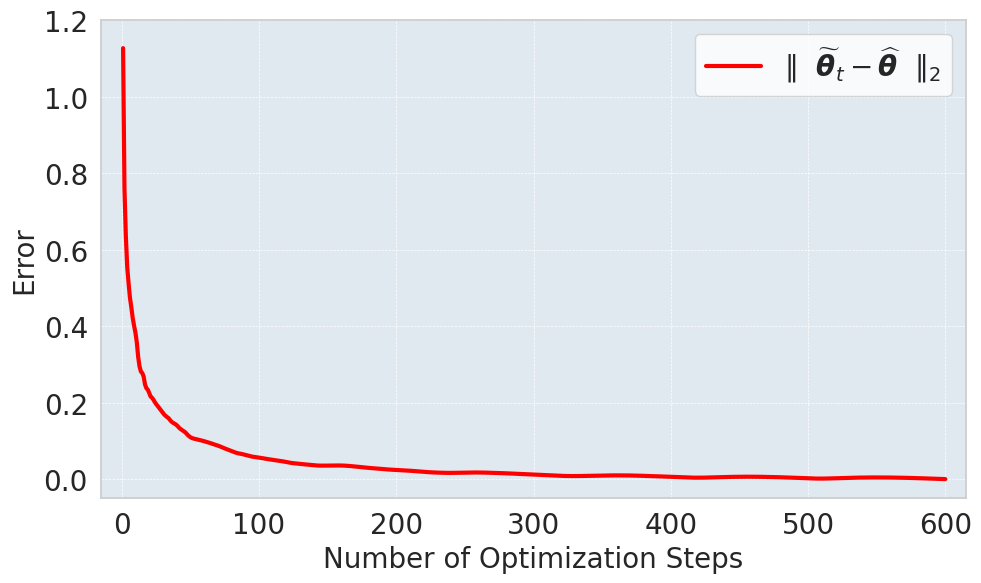

In [ ]:
# Plot results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set gray background and grid
ax1.set_facecolor("#e0e8f0")  # Milder gray (grayscale value)
# ax1.set_facecolor("#dce4ea")  # Slightly more gray and cooler

ax1.grid(color="white", linestyle="--", linewidth=0.5)
ax1.tick_params(axis="both", labelsize=20)


# Plot computational accuracy
ax1.plot(range(1, n_iterations + 1), computational_accuracy, color="red",
         label=r"$\|~~\widetilde{\boldsymbol{\theta}}_t - \widehat{\boldsymbol{\theta}}~~\|_2$", linewidth=3)
ax1.set_xlabel("Number of Optimization Steps", fontsize=20)
ax1.set_ylabel(r"Error", fontsize=20)
ax1.tick_params(axis="y")
ax1.set_xlim(-15, 615)  # Ensure x-values like -1.0 are logically needed
ax1.set_ylim(-0.05, 1.2)   # Set y-axis range from 0 to 10


# Add legend and title
fig.tight_layout()
ax1.legend(loc="upper right", fontsize=20)
plt.savefig("plot_output2.pdf", format="pdf", bbox_inches="tight")

plt.show()